In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

In [84]:
df = pd.read_csv('data/kc_house_data.csv')

# Header cleaning. More precautionary than anything else
df.columns = [x.strip().lower().replace(' ','').replace('-','') for x in df.columns]

df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [85]:
#First pass at cleaning
df['waterfront'].fillna('Unknown',inplace= True)
df['yr_renovated'].fillna(0,inplace= True)

df.dropna(subset=['view'],inplace=True)


In [86]:
# Change view rating to a numeric value. Probably don't need it
df['view'] = df['view'].map({'EXCELLENT':5,
                             'GOOD':4,
                             'FAIR':3,
                             'AVERAGE':2,
                             'NONE':1})

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  int64  
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [88]:
# The grading system
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [89]:
#Number of houses renovated in this dataset
df[df['yr_renovated']>0].shape[0]

743

In [90]:
df.select_dtypes(np.number).columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [91]:
df_pairplotting1 = df.filter(['bedrooms','bathrooms','floors','view','price'])
df_pairplotting2 = df.filter(['sqft_living', 'sqft_lot','sqft_above','sqft_living15', 'sqft_lot15','price'])

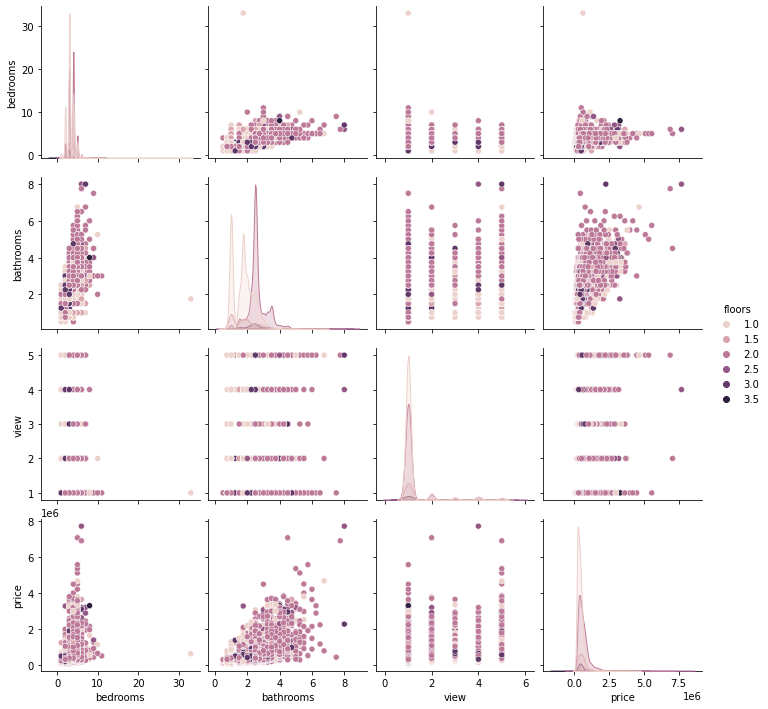

In [95]:
sns.pairplot(df_pairplotting1,hue = 'floors')

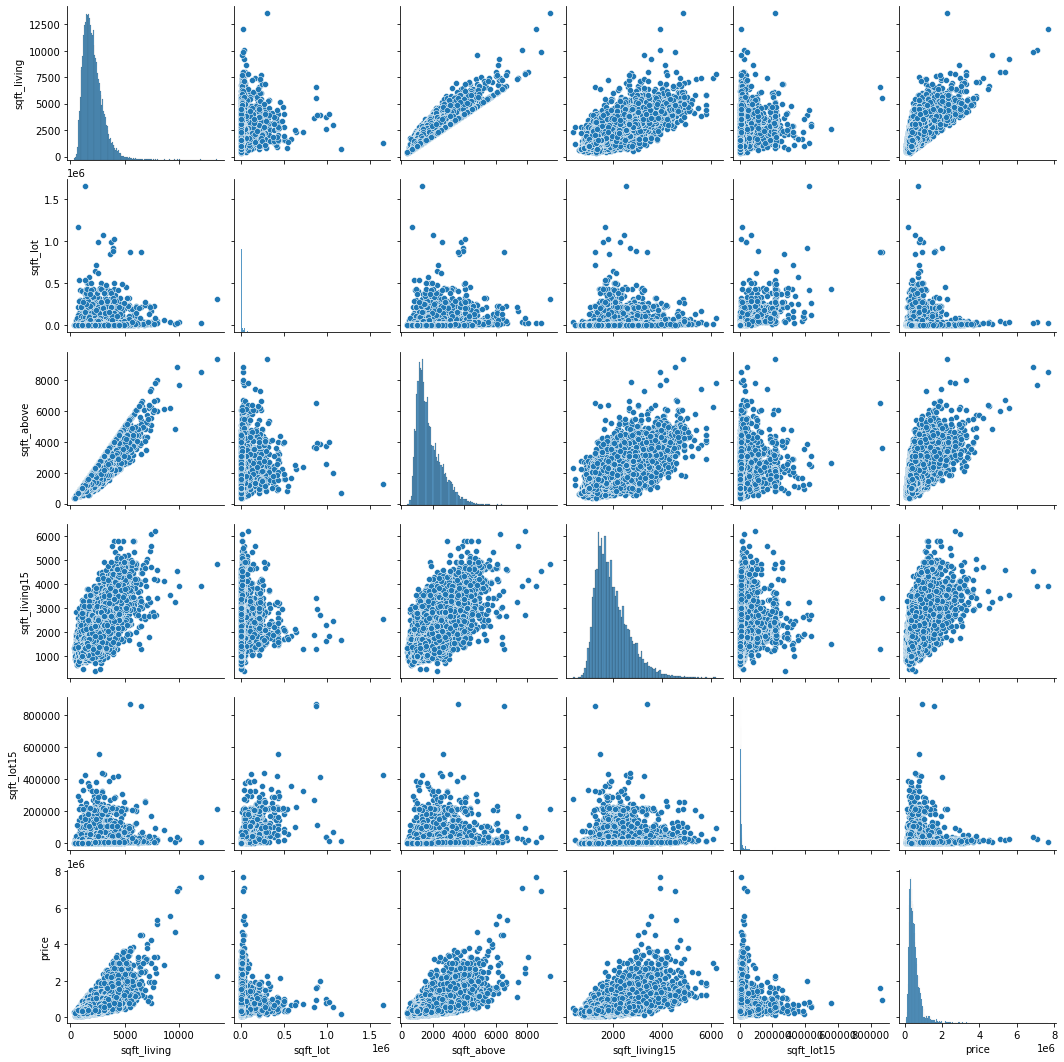

In [93]:
sns.pairplot(df_pairplotting2)